In [5]:
cd D:\DATA SCIENCE PROJECTS\DATASETS

D:\DATA SCIENCE PROJECTS\DATASETS


Import libraries


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns


Read the data

In [6]:
df=pd.read_csv("amazon_vfl_reviews.csv")
df

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...
...,...,...,...,...,...
2777,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,3/1/2020,5,Long lasting freshness throughout the day.
2778,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,10/24/2019,5,My preferred soap
2779,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,10/3/2020,2,ठीक नहीं लगा
2780,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,6/21/2019,4,Super Product


In [7]:
#Drop asian,name and date columns
df.drop(["asin","name","date"],axis=1,inplace=True)
df.head()

,rating,review
0,1,I bought this hair oil after viewing so many g...
1,5,Used This Mama Earth Newly Launched Onion Oil ...
2,1,So bad product...My hair falling increase too ...
3,1,Product just smells similar to navarathna hair...
4,5,I have been trying different onion oil for my ...


Here displaying only rating and review

In [8]:
# count the ratings
df.rating.value_counts().sum()

2782

In [10]:
df.review

0       I bought this hair oil after viewing so many g...
1       Used This Mama Earth Newly Launched Onion Oil ...
2       So bad product...My hair falling increase too ...
3       Product just smells similar to navarathna hair...
4       I have been trying different onion oil for my ...
                              ...                        
2777           Long lasting freshness throughout the day.
2778                                    My preferred soap
2779                                         ठीक नहीं लगा
2780                                        Super Product
2781    Best soothing, cooling fragrance for hot summe...
Name: review, Length: 2782, dtype: object

In [11]:
#checking any null values are there
df.isna().sum()

rating    0
review    4
dtype: int64

four reviews shows null values

In [14]:
#drop that review null values
df.dropna(inplace=True)

In [15]:
df.isna().sum()

rating    0
review    0
dtype: int64

Here drop down that null values

In [16]:
#calculate the shape of the data
df.shape

(2778, 2)

In [17]:
df.review[0]

"I bought this hair oil after viewing so many good comments. But this product is not good enough.First of all it's Expensive...Second thing the amount of the product is low (half bottle) YES!The bottle is not completely filled with oil. If you cheating on your customers #Mamaearth trust me on this you can't fool people more than once. Now I know that your Brand is not good enough. I am not going to buy any product from your Brand again.Thumbs down for mamaearth onion oil !!"

In [20]:
import string
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [21]:
def clean_text(text):
    text_lc="".join([word.lower() for word in text if word not in string.punctuation])
    text_rc=re.sub('[0-9]+','',text_lc)
    tokens=tknzr.tokenize(text_rc)
    text=[wn.lemmatize(word) for word in tokens if word not in stopword]
    return text

In [40]:
import nltk
nltk.download('wordnet')
wn=nltk.WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jogaiah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jogaiah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jogaiah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [23]:
import re

In [31]:
stopword=nltk.corpus.stopwords.words('english')

In [39]:
def clean_text(text):
    text_lc="".join([word.lower() for word in text if word not in string.punctuation])
    text_rc=re.sub('[0-9]+','',text_lc)
    tokens = word_tokenize(text_rc,language='english')
    text=[wn.lemmatize(word) for word in tokens if word not in stopword]
    return text

In [41]:
print(clean_text(df.review[0]))

['bought', 'hair', 'oil', 'viewing', 'many', 'good', 'comment', 'product', 'good', 'enoughfirst', 'expensivesecond', 'thing', 'amount', 'product', 'low', 'half', 'bottle', 'yesthe', 'bottle', 'completely', 'filled', 'oil', 'cheating', 'customer', 'mamaearth', 'trust', 'cant', 'fool', 'people', 'know', 'brand', 'good', 'enough', 'going', 'buy', 'product', 'brand', 'againthumbs', 'mamaearth', 'onion', 'oil']


Now cleaning the data is completed.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import sklearn.metrics

In [43]:
df['cleaned_review']=df['review'].apply(lambda x: clean_text(x))

In [44]:
df.head()

,rating,review,cleaned_review
0,1,I bought this hair oil after viewing so many g...,"[bought, hair, oil, viewing, many, good, comme..."
1,5,Used This Mama Earth Newly Launched Onion Oil ...,"[used, mama, earth, newly, launched, onion, oi..."
2,1,So bad product...My hair falling increase too ...,"[bad, productmy, hair, falling, increase, much..."
3,1,Product just smells similar to navarathna hair...,"[product, smell, similar, navarathna, hair, oi..."
4,5,I have been trying different onion oil for my ...,"[trying, different, onion, oil, hair, hair, he..."


Here we are adding additional column i.e.,cleaned_review

In [45]:
x=df['review']
y=df.rating.values

Modelling

In [47]:
cvt=CountVectorizer(analyzer=clean_text)
x_v=cvt.fit_transform(x)

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf=RandomForestClassifier()

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_v,y,test_size=0.33,stratify=y)

In [52]:
y_train

array([2, 1, 5, ..., 5, 5, 5], dtype=int64)

In [53]:
#modelling use Random forest classifier
rf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
#predicting y
y_pred=rf.predict(x_test)

In [55]:
# calculate confusion matrics
cm=sklearn.metrics.confusion_matrix(y_test,y_pred)

In [56]:
print(sklearn.metrics.accuracy_score(y_test,y_pred))

0.8789531079607416


Accuracy for rating is 87.89%

In [57]:
df_test=cm
df_test=pd.DataFrame(df_test)

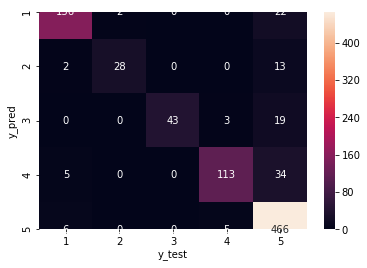

In [60]:
ax=sns.heatmap(df_test,fmt='',annot=True)
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')
ax.set_xticklabels(list(set(y_test)))
ax.set_yticklabels(list(set(y_test)));

Above heatmap is in b/w y_test and y_pred